In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#
# Neue imports für pandas und scikit-learn
#
import pandas as pd
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Einführung: Manipulieren von Daten mit Pandas

In den bisherigen Beispielen haben wir vor allem mit Numpy-Arrays gearbeitet. Für das Manipulieren von grösseren Datensätzen mit vielen Variablen, wie wir dies in typischen Machine Learning Anwendungen häufig sehen, ist numpy aber nicht geeignet. Wir können dafür stattdessen die Bibliothek [Pandas](https://pandas.pydata.org/) verwenden. Pandas bietet viele nützliche Funktionen für die Darstellung der Daten, das Auswählen von Teilmengen der Daten, sowie Sortieren und Gruppieren der Daten. So kann man zum Beispiel Variablen nach Namen auswählen und muss nicht immer mit numerischen Indizes arbeiten. Ausserdem kann ein Pandas-Dataframe, im Gegensatz zu einem Numpy-Array, Zeilen oder Spalten mit verschiedenen Datentypen enthalten.

Hier sehen Sie einige Beispiele, die für die Bearbeitung des Übungsblatts nützlich sind.

Als erstes erstellen wir uns ein Dataframe (d.h. eine Tabelle), indem wir Daten mit der `read_csv` Methode von pandas einlesen. 

In [ ]:
df = pd.read_csv('daten/periodic_table.csv')

Wir können uns die ersten paar Zeilen mit der Methode `head` anzeigen lassen:

In [ ]:
# Zeige die ersten 10 Zeilen des Dataframes
df.head(10)

Um eine Spalte auszuwählen, nutzen wir den Namen der Spalte als "Index":

In [ ]:
df['Atomic_Weight']

Wir können auch mehrere Spaltennamen als Liste angeben. In diesem Fall ist das Resultat eine neue Tabelle, die nur aus den entsprechenden Spalten besteht:

In [ ]:
df[['Symbol', 'Melting_Point', 'Boiling_Point']]

Um einzelne Spalten zu entfernen, können Sie die Methode `drop` wie nachfolgend angegeben nutzen. 

*Beachten Sie, dass diese nicht das Dataframe `df` verändert, sondern ein neues Dataframe zurückgibt, aus welchem die entsprechenden Spalten entfernt sind.*  

In [ ]:
df_with_dropped_column = df.drop(["Symbol", "Melting_Point"], axis=1)

Um einzelne Zeilen auszuwählen, nutzen wir die Methode `iloc`. Wir können einzelne Indizes oder, wie bei Numpy, einen Bereich angeben. 

In [ ]:
df.iloc[5:10]

Mit diesen Funktionen sollten Sie durch das Übungsblatt kommen. Pandas bietet aber viele weitere Funktionen. Wenn Sie mehr erfahren möchten, können wir das Buch [Python for Data Science, Kapitel 3](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) empfehlen oder natürlich die offizielle [Pandas Dokumentation](https://pandas.pydata.org/docs/).

# Aufgabe 1: Diabetesprognose mit linearer Regression

In dieser ersten Übung implementieren Sie ein Programm, welches anhand verschiedenen Messwerten lernt, Diabetes zu diagnostizieren. Die Prognose ist hier ein Zahlenwert, der das Fortschreiten der Krankheit beschreibt. Es handelt sich also um ein Regressionsproblem.

## a)

Verwenden Sie pandas, um den Datensatz `diabetes.csv` in ein DataFrame `df` zu laden. Wenn Sie `df.head()` ausführen, erhalten Sie:

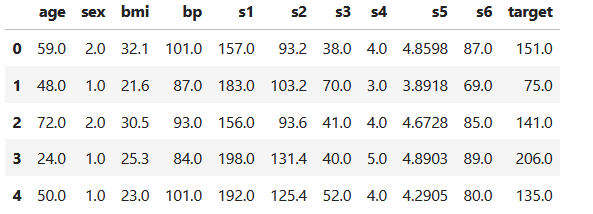

Jede Zeile repräsentiert die Messwerte für einen Patienten. Alle Messwerte wurden standardisiert indem der Durchschnittswert abgezogen wurde, und die letzte Spalte `target` quantifiziert das Fortschreiten von Diabetes nach einem Jahr. Die anderen Spalten entsprechen folgenden Messwerten:

* age: Alter in Jahren.
* sex: Biologisches Geschlecht, kodiert und standardisiert als numerischer Wert.
* bmi: Body-Mass-Index (BMI).
* bp: Durchschnittlicher Blutdruck (in mm Hg).
* s1: Gesamtserumcholesterinspiegel (in mg/dL).
* s2: Cholesterin mit niedriger Dichte (LDL) (in mg/dL).
* s3: Cholesterin mit hoher Dichte (HDL) (in mg/dL).
* s4: Gesamtserumtriglyceridspiegel (in mg/dL).
* s5: Leberenzym Alanin-Aminotransferase (ALT).
* s6: Nüchternblutzuckerspiegel (in mg/dL).

1. Erstellen Sie zwei Dataframes `X` und `y`. Hierbei soll `y` nur die `target`-Werte und `X` alle anderen Spalten enthalten.
2. Erstellen Sie ein lineares Regressionsmodell mittels [scikit-learn](https://scikit-learn.org/stable/index.html) und passen Sie dieses auf den Diabetes Datensatz an.
(Erklärungen und Beispiele wie Sie ein Regressionsmodell in scikit-learn verwenden finden Sie [hier](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)). Nutzen Sie das Modell um für alle in `X` vorhandenen Patienten den Krankheitsverlauf vorherzusagen.  
3. Als nächstes sollen Sie ihr Modell evaluieren. Scikit-learn stellt Ihnen hierfür bereits verschiedene Metriken zur Verfügung. Wir verwenden hier den `r2_score` (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score'>Dokumentation</a>). Der `r2_score` (auch Coefficient of determination oder Bestimmtheitsmass genannt) ist eine dimensionslose Grösse, die typischwerweise zwischen 0 und 1 liegt. Ein Wert von 1 bedeutet, dass die Daten perfekt erklärt wurden. Bei einem Wert von 0 ist die Vorhersage nicht besser, als wenn man einfach den Durchschnitt der Zielwerte für die Vorhersage verwendet hätte. Negative Werte bedeuten, dass die Vorhersage sogar schlechter ist, als wenn man die Messwerte gar nicht verwendet hätte und immer nur den Mittelwert schätzen würde. Welchen Wert erreichen Sie?


In [ ]:
# Laden der Daten


In [ ]:
# Aufteilen der Daten in Zielwert (y) und alle anderen Spalten (X)

X = ...
y = ...


In [ ]:
# Erstellen und Anpassen des Regresionsmodells
...


In [ ]:
# Vorhersagen und berechnen des r2 Werts
y_pred = ...
r2 = ...


## Aufgabe 2: Diabetesprognose mit Neuronalen Netzen

In dieser Aufgabe nutzen Sie wieder den Diabetes Datensatz der vorherigen Aufgabe, trainieren aber diesmal ein neuronales Netz um die Krankheit zu diagnostizieren. Dafür sollen sie wieder scikit-learn verwenden. 

In scikit-learn wird nur eine Art von neuronalem Netz unterstützt, nämlich sogenannte Multilayer Perceptrons. Dies sind neuronale Netze, bei denen jeweils alle Neuronen in einem Layer mit allen Neuronen des nächsten Layers verknüpft sind.  Entsprechend einfach ist die Definition des Netzwerk. Sie können  durch eine Liste die Anzahl Neuronen in den hidden layers angeben. Multilayer Perceptrons können sowohl für Regression als auch für die Klassifikation ([MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)) verwendet werden. Schauen Sie sich [die Dokumentation für MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) an um einen Überblick dafür zu bekommen, wie Sie das Modell verwenden. 

Da wir bei neuronalen Netzen die Parameter durch Optimierung finden müssen, ist es oft hilfreich die Daten zu skalieren, so dass die Beobachtungen für jede Messung Mittelwert 0 und dieselbe Standardabweichung haben. Dies erreichen Sie durch folgendes Codesnippet, welcher den [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) von scikit-learn nutzt. 

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))


Definieren Sie nun ein Neuronales Netz mit einem hidden layer mit 10 Neuronen. Rechnen Sie wieder den r2_score aus. Setzen Sie die Anzahl der iterationen für die Optimieren (`max_iter`) auf 30000 (Siehe [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)).

In [ ]:
...

y_pred = ... # Vorhersagen
r2 = ...     # r2 score

# Aufgabe 3: Overfitting

Wenn wir machine-learning Modelle vielen Parametern definieren, besteht die Gefahr, dass diese nicht die Muster in den Daten lernen , sondern die Daten einfach Memorisieren. Als Vorbereitung für die nächste Vorlesung, wollen wir in dieser Aufgabe diesem Phänomen auf die Spur kommen. 

a) Kopieren Sie Ihre Lösung von oben und fitten Sie nochmals das Modell. Nutzen Sie diesmal aber mehrere Hidden Layer und eine grössere Zahl von Neuronen. Schaffen Sie es, einen `r_score` von über 0.99 zu erhalten?

b) Wir haben für Sie einen zweiten Datensatz `diabetes_test.csv` erstellt. Dieser enthält Daten von weiteren Patienten. Nehmen sie das angepasste Modell und machen Sie vorhersagen für diese Patienten. Was beobachten Sie? Was ist der `r2_score`? Tip: vergessen Sie nicht die Messwerte wieder zu skalieren.  

In [ ]:
# Anpassen eines Modells mit vielen Parametern 
...


In [ ]:
# Laden von Testdaten und aufteilen in Zielwert und restliche Werte
df_test = ...
X_test = ...
y_test = ...

# Skalieren
X_test_scaled = ...

# Vorhersage mit vorher trainiertem Modell
rs_test = ...


# Aufgabe 4: Klassifikation mit neuronalen Netzen

a) In dieser letzten Aufgaben wenden wir ein neuronales Netz für die Klassifikation von Daten. Dafür laden Sie den Datensatz `cancer.csv`. Wenn Sie `df.head()` ausführen, erhalten Sie:

```text
   radius_mean  texture_mean  ...  fractal_dimension_worst  diagnosis
0        13.74         17.91  ...                  0.07014          0
1        13.37         16.39  ...                  0.07628          0
2        14.69         13.98  ...                  0.09208          0
3        12.91         16.33  ...                  0.06949          0
4        13.62         23.23  ...                  0.06953          0
```

Jede Zeile stellt eine Zelle dar. Die letzte Spalte (`diagnosis`) ist 1, wenn die Zelle krebsartig ist, und 0 falls diese gutartig ist. Alle anderen Spalten beschreiben geometrische Merkmale der Zelle.

a) Erstellen Sie wieder zwei Dataframes `X` und `y`, wobei `y` nur die Diagnosen enthalten und `X` alle anderen Spalten. Nutzen Sie [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) und machen Sie eine Vorhersage auf den Daten. Berechnen Sie die *Accuracy*, also die Anzahl korreker Vorhersagen dividiert durch die Anzahl Vorhersagen. 

b) Testen Sie Ihre Vorhersagen anhand den Testdaten in `cancer_test.csv`. 

In [ ]:
# Laden der Daten
df_cancer = ...
X_cancer = ...
y_cancer = ...

# Daten Skalieren
...
X_cancer_scaled = ...

# Erstellen und anpassen des Modells
...

# Vorhersagegenauigkeit berechnen. 


In [ ]:
# Laden der Testdaten
df_test_cancer = ...

# Aufteilen in Zielwert und andere Spalten 
X_test_cancer = ...
y_test_cancer = ...

# Daten Skalieren
X_test_cancer_scaled = ...

# Vorhersage
